In [1]:
import os
import numpy as np
from astropy.io import fits
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [16]:
def get_dataset():
    dirs = ['../data/Galaxy/', '../data/Star/', '../data/QSO/']
    dataset = []
    dataset_waves = []
    min = -np.inf
    max = np.inf
    for i in dirs:
        files = os.listdir(i)
        for j in files:
            fitsFile = fits.open(i + j)
            spectra = fitsFile[0].data[0]
            wave_len = fitsFile[0].data[2]
            if wave_len[0]>min:
                min = wave_len[0]   # 获取所有光谱中最大的起始波长和最小的终止波长
            if wave_len[-1]<max:
                max = wave_len[-1]
            # print(wave_len,spectra.shape)
            if len(spectra)>1000:  # 防止空数据，好像没什么用
                dataset.append(spectra)
                dataset_waves.append(wave_len)
                
    print(min,max)
    
    return dataset, dataset_waves,min,max



In [17]:
# 获取数据, 查看一下每个光谱的维度却是不一样的，这样就没法直接拿来用
spectra, waves, wave_min, wave_max = get_dataset()
for i in spectra[:20]:
    print(len(i))


3838.839 8914.597
3909
3892
3892
3909
3909
3909
3904
3749
3909
3909
3909
3749
3749
3906
3909
3909
3909
3909
3909
3890


In [18]:
# 先直接截取后2750个波长，使它们维度相同
for i in range(len(waves)):
    if i%200==0:
        print('截取进度：',i)
    j = -1
    while 1:
        if waves[i][j]<=wave_max:
            spectra[i] = spectra[i][j-2750:j]
            break
        j = j-1

dataset = np.array(spectra)

截取进度： 0
截取进度： 200
截取进度： 400
截取进度： 600
截取进度： 800
截取进度： 1000
截取进度： 1200
截取进度： 1400
截取进度： 1600
截取进度： 1800
截取进度： 2000
截取进度： 2200
截取进度： 2400
截取进度： 2600
截取进度： 2800


In [20]:
# 画光谱
def plot_spectra(x,y=None):
    # x是一条光谱的数据，y是波长
    # 只传入光谱的话就按顺序依次画
    if y==None:
        y=list(range(len(x)))
    plt.plot(y,x)
    plt.show

[441.64282 454.5899  451.36307 ... 162.14471 150.87024 149.7592 ] 维度： 2750
[339.67294  333.79382  336.7081   ... 133.97908  127.50347  116.779144] 维度： 2750
[323.75366 317.43393 314.61227 ... 109.91223 110.07165 111.90744] 维度： 2750
[314.5194   308.1377   311.01318  ...  99.578415 103.6289    97.5535  ] 维度： 2750
[439.3831  417.38922 432.0825  ... 181.56665 189.21587 177.50948] 维度： 2750
[496.88275 497.163   505.00504 ... 190.28262 173.11806 172.81659] 维度： 2750
[3069.902   3083.487   3057.0618  ...  859.3404   875.73175  863.95984] 维度： 2750
[6380.749  6411.272  6492.8164 ... 2132.4158 2131.9739 2120.6965] 维度： 2750
[1287.7047  1307.5557  1319.3436  ...  672.6874   687.54224  683.2509 ] 维度： 2750
[4175.415  4250.8555 4308.714  ... 1186.6527 1213.9845 1188.2396] 维度： 2750


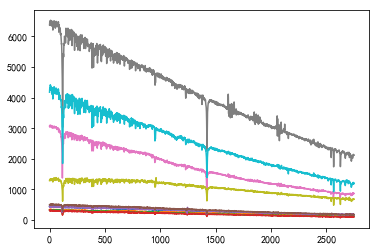

In [24]:
# 画出10条光谱
for i in range(1000,1010):
    print(spectra[i],'维度：',len(spectra[i]))
    plot_spectra(spectra[i])

In [ ]:
# 但是上图显示光谱的尺度不同，这样也直接训练也出不来效果

In [25]:
# 矩阵按行归一化，结果发现归一化效果并不好
def normalization(data):
    _range = data.max(axis=1) - data.min(axis=1)
    print(_range)
    return (data - data.min(axis=1).reshape(-1,1)) / _range.reshape(-1,1)

In [26]:
# 导入正则化函数，（减均值除方差）
from sklearn.preprocessing import normalize

In [28]:
dataset = normalize(dataset)
dataset

array([[ 0.02089282,  0.02097243,  0.01888917, ...,  0.01593135,
         0.01495326,  0.01508125],
       [ 0.02252111,  0.02197751,  0.0202312 , ...,  0.01656725,
         0.01743072,  0.01656411],
       [ 0.02621003,  0.02610732,  0.0238334 , ...,  0.01115472,
         0.01311579,  0.01353458],
       ...,
       [ 0.02714405,  0.02829883,  0.02846903, ..., -0.00330591,
         0.00585458,  0.00994185],
       [ 0.02594009,  0.02684072,  0.03026972, ...,  0.01426742,
         0.00345604,  0.00671052],
       [ 0.02668587,  0.02998853,  0.02375766, ...,  0.00990094,
         0.00944759,  0.01023256]], dtype=float32)

In [29]:
dataset.shape

(3000, 2750)

In [30]:
from sklearn.cluster import KMeans

In [31]:
# 执行K-means
y_pred = KMeans(n_clusters=3, random_state=9).fit_predict(dataset)

In [32]:
from collections import Counter

In [34]:
# 显示结果，每一行是一类的，被分到三个类中了
print(Counter(y_pred[0:1000]))
print(Counter(y_pred[1001:2000]))
print(Counter(y_pred[2001:3000]))

Counter({2: 720, 0: 261, 1: 19})
Counter({1: 803, 0: 190, 2: 6})
Counter({1: 539, 0: 338, 2: 122})
